# Analysis of Experiment with youtube shorts

For a week, youtube shorts with different styles were uploaded on youtube to test if one style is better than other style. 

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot

In [2]:
df = pd.DataFrame(
    [{ 'title': 'python f strings tip', 'group': 'B', 'publish_date': '07-06-2025', 'views': 6}, 
    { 'title': 'extract elements from tuple', 'group': 'A', 'publish_date': '06-06-2025', 'views': 207}, 
    { 'title': 'how to format a date', 'group': 'B', 'publish_date': '05-06-2025', 'views': 116}, 
    { 'title': 'find unique elements in a list', 'group': 'A', 'publish_date': '04-06-2025', 'views': 59}, 
    { 'title': 'debug like a pro', 'group': 'B', 'publish_date': '03-06-2025', 'views': 141}, 
    { 'title': 'are you a noob or pro', 'group': 'A', 'publish_date': '02-06-2025', 'views': 149}]
)

In [4]:
df['publish_date'] = pd.to_datetime(df['publish_date'])

# Population Characteristics

In [11]:
df.groupby('group')['views'].describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
A,3.0,138.333333,74.574348,59.0,104.0,149.0,178.0,207.0
B,3.0,87.666667,71.821538,6.0,61.0,116.0,128.5,141.0


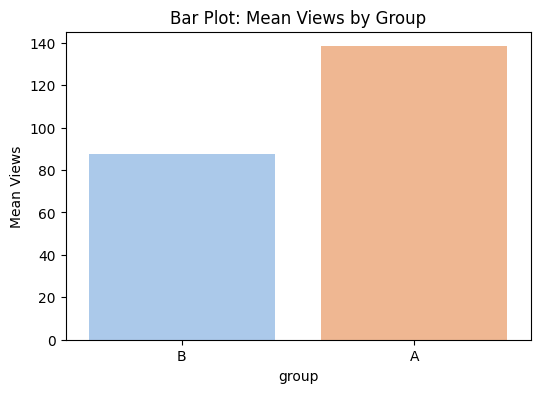

In [21]:
plt.figure(figsize=(6, 4))
sns.barplot(x='group', y='views', data=df, estimator='mean', errorbar=None, palette='pastel', hue='group')
plt.title('Bar Plot: Mean Views by Group')
plt.ylabel('Mean Views')
plt.show()

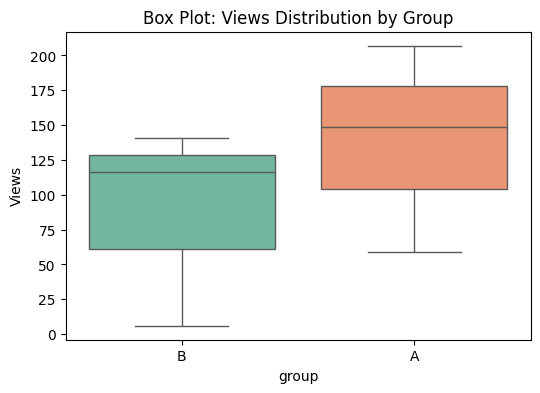

In [23]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='group', y='views', data=df, palette='Set2', hue='group')
plt.title('Box Plot: Views Distribution by Group')
plt.ylabel('Views')
plt.show()

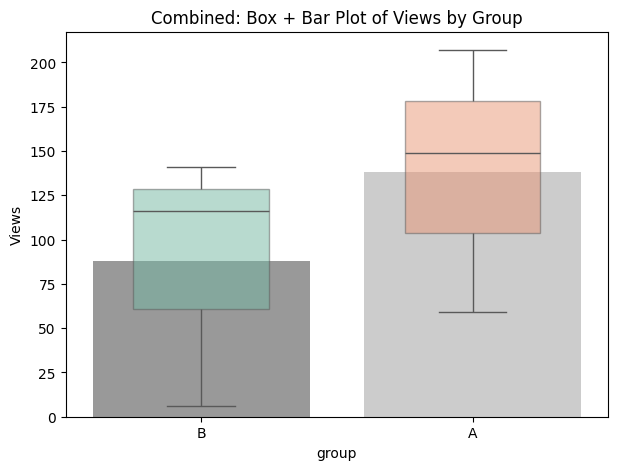

In [26]:
plt.figure(figsize=(7, 5))

# Box plot (for distribution)
sns.boxplot(x='group', y='views', data=df, width=0.5, palette='Set2', boxprops=dict(alpha=0.5), hue='group')

# Overlay bar plot (for mean)
sns.barplot(x='group', y='views', data=df, estimator='mean', errorbar=None, palette='gray', alpha=0.6, hue='group')

plt.title('Combined: Box + Bar Plot of Views by Group')
plt.ylabel('Views')
plt.show()


# Test for normality

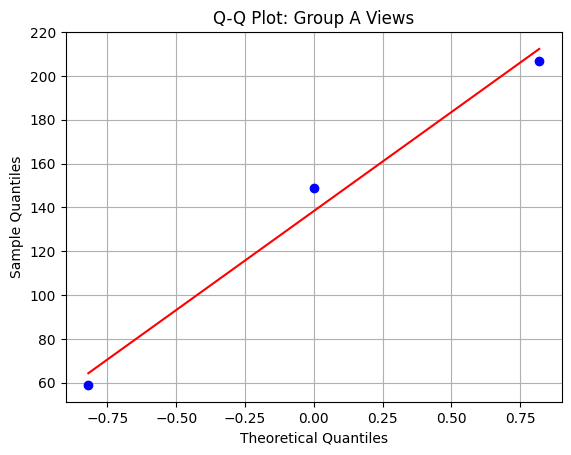

In [28]:
views_a = df[df.group == 'A']['views']
probplot(views_a, dist="norm", plot=plt)
plt.title("Q-Q Plot: Group A Views")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid(True)
plt.show()

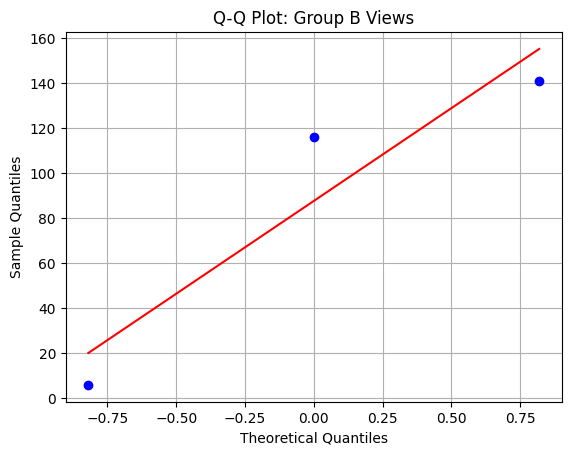

In [29]:
views_a = df[df.group == 'B']['views']
probplot(views_a, dist="norm", plot=plt)
plt.title("Q-Q Plot: Group B Views")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid(True)
plt.show()

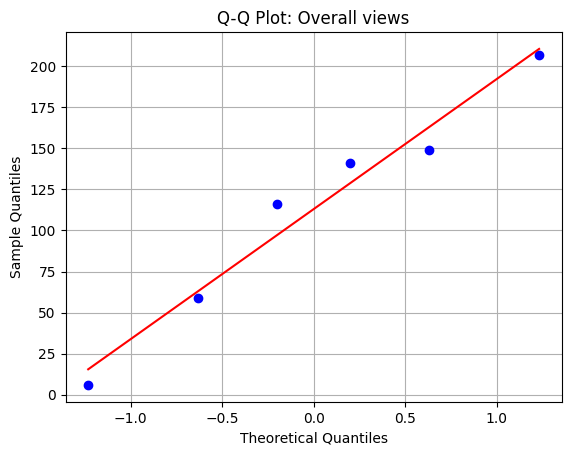

In [30]:
views = df['views']
probplot(views, dist="norm", plot=plt)
plt.title("Q-Q Plot: Overall views")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid(True)
plt.show()

In [33]:
from scipy.stats import shapiro, normaltest

# Group-wise normality testing
for group in df['group'].unique():
    views = df[df['group'] == group]['views']
    
    print(f"\nGroup {group}:")
    
    # Shapiro-Wilk Test
    stat_s, p_s = shapiro(views)
    print(f"  Shapiro-Wilk:     W={stat_s:.3f}, p-value={p_s:.4f}")
    
    # D’Agostino and Pearson Test
    # This test needs at least 8 values, will raise warning for n<8
    if len(views) >= 8:
        stat_n, p_n = normaltest(views)
        print(f"  Normal Test:      χ²={stat_n:.3f}, p-value={p_n:.4f}")
    else:
        print("  Normal Test:      ❌ Not enough data (requires ≥8 samples)")



Group B:
  Shapiro-Wilk:     W=0.883, p-value=0.3341
  Normal Test:      ❌ Not enough data (requires ≥8 samples)

Group A:
  Shapiro-Wilk:     W=0.985, p-value=0.7628
  Normal Test:      ❌ Not enough data (requires ≥8 samples)


In [34]:
from scipy.stats import mannwhitneyu 

views_a = df[df['group'] == 'A']['views']
views_b = df[df['group'] == 'B']['views']

# Perform Mann–Whitney U test
stat, p = mannwhitneyu(views_a, views_b, alternative='two-sided')

# Print results
print(f"Mann–Whitney U test:")
print(f"  U-statistic = {stat}")
print(f"  p-value     = {p:.4f}")

Mann–Whitney U test:
  U-statistic = 7.0
  p-value     = 0.4000
